# **Predicting "Success" in the NBA**

## CMSC320 Fall 2024 Data Science Final Project  
Collaborators: Evan Hild, John Li, Logan Sampath, Arjun Shah, Samuel Tran

Contributions:  

**Evan**: Assisted in creating API requests. Ran API requests to obtain necessary data. Wrote and trained the neural network model. Cleaned data for the neural network model. Evaluated results of the neural network model.

**John**: Consolidated all the parts into the final Colab Notebook, adding in little comments for the tutorial explaining what was going on. Published the final Colab Notebook to Github pages. Also worked on the Introduction and Insights and Conclusions sections, adding details and also external sources.

**Logan**: Used the playoff game dataset and created a notebook to study the connection between minutes played and stats such as points, rebounds, and assists. Used linear regression model to make predictions. Made summary of final result and this notebook became a part of the final paper.

**Arjun**: Accessed the API and pulled data relavent to the project. Helped clean the data, create visualizations, and create conclusions based on the results.

**Sam**: Helped develop and clean the dataset, getting the data that we wanted to work with. Also, explored and summarized the initial data. Visualized the data and worked on result analysis.

### Introduction:
The purpose of our project is to deliver a tutorial on the data science life cycle and give an example of how each step is performed. To do this, we decided to look into and collect our initial data from the National Basketball Association, aka the NBA, [one of the biggest industries in Sports Entertainment](https://www.digitalcenter.org/columns/cole-sports-in-media/#:~:text=Second%20on%20the%20list%20of,nine%20years%20with%20the%20NFL.) in the USA. Our goal through using data science was to provide analysis and insight into multiple areas into the NBA. This insight is intended for NBA coaches, players, NBA Award voters, and viewers of the sport in general. In the modern era of the NBA, the average ability of each player is at the maximum the league has ever seen. In other words, [the league is better than ever](https://www.theatlantic.com/health/archive/2023/10/nba-player-athleticism-physicality-evolution/675802/). Each player on an NBA team could have the potential to score 30 points on any given night. Because of this, it has become way harder to distinguish between a good NBA player versus a star NBA player. We want to use the data to understand the current state of the league, compare teams to the league as a whole, and see how players can change over time. We also want to use hypothesis testing and machine learning to help generate better insights and allow us to make predictions.
  
Why? Well it has been harder than ever for NBA pundits to decide on awards like the MVP, DPOY, or even all-star nominations. We would like to look into strategies that could be put into place to help make those decisions easier, or also just to help the average viewer out there find their next favorite player!


### Data Curation:
The NBA API is a tool created to allow users to access statistics posted on nba.com. Instead of having to worry about web scraping, the NBA API has endpoints that allow us to easily gather data using just a few prompts. It was created by Swar to allow data scientists and basketball fans to access this data. This is data directly from the NBA database and it is the
most documented database for basketball. With this API, we can get all the needed statistics in
one place.  
https://github.com/swar/nba_api   
   
In this step of the data science lifecycle we are gathering data essentially from the web and preparing it for analysis.
  


The NBA api can provide a diverse amount of data that we can perform statistical tests on. In our case, we are limiting our scope to NBA teams, at least past the year 2000. We will query data for individual players or teams. For individual players we can select from 27 different attributes ranging from pts to rebounds to free throw percentage. Teams have 30 different attributes from league to date of game played to points scored among other attributes. There are four different tests that are performed below with their respective graphs. The sections below will go further in depth for what attributes are being tested and the outcomes of the tests.

The following libraries were used: Pandas, nba_api, scipy, seaborn, matplotlib

In [ ]:
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

The following section queries the NBA api and finds games based on the following criteria: The game is played in the NBA, the game is during the regular season, and the game was played after 2012. That data is loaded into a dataframe. Then the data is grouped by the team who played and the year it was played. Then the Plus-minus (the margin of victory) is aggregated by mean. This results in a data frame with a team, year and mean of the margin of victory for the season. Then the data frame is exported to a csv file.

In [ ]:
#This line selects all games from the NBA in the regular season
gamefinder = leaguegamefinder.LeagueGameFinder(league_id_nullable='00', season_type_nullable = 'Regular Season')
games = gamefinder.get_data_frames()[0]

print(games.head())

# This section filters for all games played after 2012
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])
games['YEAR'] = games['GAME_DATE'].dt.year
games = games[games['YEAR'] >= 2012]

# Group by year and team and then calculate the mean plus mins for each team per year
average_plus_minus_per_year = games.groupby(['TEAM_NAME', 'YEAR'])['PLUS_MINUS'].mean().reset_index()

# Rename the collumns
average_plus_minus_per_year.columns = ['Team', 'Year', 'Average_Plus_Minus']

# Display the result
print(average_plus_minus_per_year.sort_values(by='Average_Plus_Minus', ascending=False))

average_plus_minus_per_year.to_csv('Plus_Minus_Over_Year.csv')

  SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME     GAME_ID  \
0     22023  1610612754               IND         Indiana Pacers  0022301188   
1     22023  1610612762               UTA              Utah Jazz  0022301198   
2     22023  1610612749               MIL        Milwaukee Bucks  0022301191   
3     22023  1610612766               CHA      Charlotte Hornets  0022301187   
4     22023  1610612744               GSW  Golden State Warriors  0022301198   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2024-04-14  IND vs. ATL  W  239  157  ...   0.800    12    36   48   41   
1  2024-04-14    UTA @ GSW  L  240  116  ...   0.625    14    34   48   22   
2  2024-04-14    MIL @ ORL  L  238   88  ...   0.913     7    27   34   16   
3  2024-04-14    CHA @ CLE  W  241  120  ...   0.818    10    37   47   36   
4  2024-04-14  GSW vs. UTA  W  239  123  ...   0.826    12    30   42   35   

   STL  BLK  TOV  PF  PLUS_MINUS  
0   10    6   1

Next, we wanted to collect some data on one of the greatest players of all time, Lebron James, to see if there is anything special about his statistics.

In [ ]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
import numpy as np


In [ ]:
# Get LeBron James' player ID
lebron = players.find_players_by_full_name('lebron james')[0]
lebron_id = lebron['id']

# Get LeBron James' career stats
career_stats = playercareerstats.PlayerCareerStats(player_id=lebron_id, per_mode36='PerGame')


box_scores = pd.read_csv('box_scores.csv')
lebron_postseason = box_scores[box_scores['PLAYER_NAME'] == 'LeBron James']
lebron_career = career_stats.get_data_frames()[0]

# Print out LeBron's regular season and postseason stats
print("LeBron James' Career Season Stats")
print(lebron_career.head())

print("\nLeBron James' Postseason Stats")
print(lebron_postseason.head())



LeBron James' Career Season Stats
   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
0       2544   2003-04        00  1610612739               CLE        19.0   
1       2544   2004-05        00  1610612739               CLE        20.0   
2       2544   2005-06        00  1610612739               CLE        21.0   
3       2544   2006-07        00  1610612739               CLE        22.0   
4       2544   2007-08        00  1610612739               CLE        23.0   

   GP  GS   MIN   FGM  ...  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF  \
0  79  79  39.5   7.9  ...   0.754   1.3   4.2  5.5  5.9  1.6  0.7  3.5  1.9   
1  80  80  42.3   9.9  ...   0.750   1.4   6.0  7.4  7.2  2.2  0.7  3.3  1.8   
2  79  79  42.5  11.1  ...   0.738   0.9   6.1  7.0  6.6  1.6  0.8  3.3  2.3   
3  78  78  40.9   9.9  ...   0.698   1.1   5.7  6.7  6.0  1.6  0.7  3.2  2.2   
4  75  74  40.4  10.6  ...   0.712   1.8   6.1  7.9  7.2  1.8  1.1  3.4  2.2   

    PTS  
0  20.

For the following section this a large query on the dataset that takes almost an hour to run. The csv file called box_scores.csv contains the results of this query. It collects all the data from Playoff games since the year 2000.

In [ ]:
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import boxscoretraditionalv2

playoff_games = leaguegamefinder.LeagueGameFinder(season_type_nullable='Playoffs',
                                                  league_id_nullable='00').get_data_frames()[0]
# Get unique game IDs as an array
playoff_games = playoff_games[playoff_games['GAME_DATE'] > '2000-01-01']
playoff_game_ids = playoff_games['GAME_ID'].unique()


# Initialize an empty list to store box scores
box_scores_list = []

# Loop through each game ID and fetch the box scores
for game_id in playoff_game_ids:
    box_score = boxscoretraditionalv2.BoxScoreTraditionalV2(game_id=game_id).get_data_frames()[0]
    box_scores_list.append(box_score)

# Combine all the box scores into a single dataframe
box_scores_df = pd.concat(box_scores_list, ignore_index=True)

box_scores_df.to_csv('box_scores.csv')



With this csv now created, we now want to split up this data and focus in on Lebron in the playoffs. We will also split it up and differentiate between his time playing for the Lakers in the playoffs and the other teams in his career.

In [ ]:
box_scores = pd.read_csv('box_scores.csv')

lebron = box_scores[box_scores['PLAYER_NAME'] == 'LeBron James']
lebron

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
1355,1355,42300155,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,1.0,8.0,9.0,11.0,4.0,0.0,1.0,4.0,30.0,3.0
1563,1563,42300154,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,1.0,4.0,5.0,4.0,3.0,1.0,6.0,0.0,30.0,1.0
1756,1756,42300153,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,0.0,6.0,6.0,9.0,2.0,1.0,3.0,3.0,26.0,-8.0
2021,2021,42300152,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,0.0,8.0,8.0,12.0,2.0,2.0,2.0,3.0,26.0,2.0
2162,2162,42300151,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,2.0,4.0,6.0,8.0,1.0,1.0,7.0,1.0,27.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40086,40086,40500135,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,5.0,2.0,7.0,6.0,2.0,0.0,4.0,5.0,45.0,-4.0
40341,40341,40500134,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,1.0,5.0,6.0,5.0,0.0,0.0,7.0,5.0,38.0,-16.0
40509,40509,40500133,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,1.0,4.0,5.0,3.0,2.0,0.0,4.0,3.0,41.0,1.0
40737,40737,40500132,1610612739,CLE,Cleveland,2544,LeBron James,LeBron,F,NaN,...,2.0,7.0,9.0,2.0,2.0,3.0,10.0,5.0,26.0,-2.0


In [ ]:
lakers_lebron = lebron[lebron['TEAM_CITY'] == 'Los Angeles']
lakers_lebron

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
1355,1355,42300155,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,1.0,8.0,9.0,11.0,4.0,0.0,1.0,4.0,30.0,3.0
1563,1563,42300154,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,1.0,4.0,5.0,4.0,3.0,1.0,6.0,0.0,30.0,1.0
1756,1756,42300153,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,0.0,6.0,6.0,9.0,2.0,1.0,3.0,3.0,26.0,-8.0
2021,2021,42300152,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,0.0,8.0,8.0,12.0,2.0,2.0,2.0,3.0,26.0,2.0
2162,2162,42300151,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,2.0,4.0,6.0,8.0,1.0,1.0,7.0,1.0,27.0,-9.0
2533,2533,42200314,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,2.0,8.0,10.0,9.0,2.0,0.0,1.0,1.0,40.0,-2.0
2590,2590,42200313,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,0.0,7.0,7.0,12.0,0.0,0.0,2.0,2.0,23.0,-4.0
2630,2630,42200312,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,0.0,9.0,9.0,10.0,4.0,2.0,3.0,2.0,22.0,4.0
2687,2687,42200311,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,3.0,9.0,12.0,9.0,0.0,1.0,3.0,1.0,26.0,-6.0
2783,2783,42200236,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,...,0.0,9.0,9.0,9.0,2.0,1.0,2.0,2.0,30.0,21.0


And finally, we wanted to collect some more data based on arguably the "worst" team since the turn of the century, the Philadelphia 76ers, to see if anything about their data  jumps out. We will use the same csv with the playoff box scores.

In [ ]:
box_scores = pd.read_csv('box_scores.csv')
box_scores.dropna(subset=['START_POSITION'], inplace=True)
box_scores

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0,42300405,1610612742,DAL,Dallas,1627884,Derrick Jones Jr.,Derrick,F,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,-8.0
1,1,42300405,1610612742,DAL,Dallas,1629023,P.J. Washington,P.J.,F,NaN,...,0.0,6.0,6.0,3.0,0.0,2.0,4.0,3.0,4.0,-26.0
2,2,42300405,1610612742,DAL,Dallas,1629655,Daniel Gafford,Daniel,C,NaN,...,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,6.0,-7.0
3,3,42300405,1610612742,DAL,Dallas,202681,Kyrie Irving,Kyrie,G,NaN,...,1.0,2.0,3.0,9.0,1.0,0.0,1.0,2.0,15.0,-11.0
4,4,42300405,1610612742,DAL,Dallas,1629029,Luka Dončić,Luka,G,NaN,...,0.0,12.0,12.0,5.0,3.0,0.0,7.0,3.0,28.0,-19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52279,52279,49900002,1610612759,SAS,San Antonio,251,Sean Elliott,Sean,F,NaN,...,0.0,3.0,3.0,0.0,0.0,2.0,1.0,4.0,15.0,-4.0
52280,52280,49900002,1610612759,SAS,San Antonio,955,Samaki Walker,Samaki,F,NaN,...,4.0,12.0,16.0,1.0,0.0,3.0,3.0,3.0,13.0,-2.0
52281,52281,49900002,1610612759,SAS,San Antonio,764,David Robinson,David,C,NaN,...,2.0,9.0,11.0,3.0,1.0,2.0,0.0,5.0,11.0,3.0
52282,52282,49900002,1610612759,SAS,San Antonio,422,Avery Johnson,Avery,G,NaN,...,0.0,3.0,3.0,4.0,2.0,0.0,3.0,2.0,14.0,-1.0


In [ ]:
sixers = box_scores[box_scores['TEAM_ABBREVIATION'] == 'PHI']
sixers

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
1204,1204,42300116,1610612755,PHI,Philadelphia,1626162,Kelly Oubre Jr.,Kelly,F,NaN,...,3.0,2.0,5.0,1.0,1.0,1.0,2.0,5.0,17.0,8.0
1205,1205,42300116,1610612755,PHI,Philadelphia,202699,Tobias Harris,Tobias,F,NaN,...,0.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,-10.0
1206,1206,42300116,1610612755,PHI,Philadelphia,203954,Joel Embiid,Joel,C,NaN,...,5.0,8.0,13.0,2.0,1.0,1.0,5.0,6.0,39.0,-2.0
1207,1207,42300116,1610612755,PHI,Philadelphia,200768,Kyle Lowry,Kyle,G,NaN,...,0.0,2.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,-9.0
1208,1208,42300116,1610612755,PHI,Philadelphia,1630178,Tyrese Maxey,Tyrese,G,NaN,...,1.0,4.0,5.0,5.0,2.0,0.0,1.0,2.0,17.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52219,52219,49900004,1610612755,PHI,Philadelphia,248,George Lynch,George,F,NaN,...,1.0,5.0,6.0,0.0,0.0,0.0,0.0,4.0,10.0,6.0
52220,52220,49900004,1610612755,PHI,Philadelphia,238,Tyrone Hill,Tyrone,F,NaN,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,10.0,1.0
52221,52221,49900004,1610612755,PHI,Philadelphia,689,Theo Ratliff,Theo,C,NaN,...,3.0,5.0,8.0,1.0,1.0,4.0,2.0,6.0,9.0,4.0
52222,52222,49900004,1610612755,PHI,Philadelphia,947,Allen Iverson,Allen,G,NaN,...,3.0,2.0,5.0,3.0,3.0,0.0,4.0,1.0,40.0,11.0


Yayy!! Now that we've collected and cleaned the data for what we want, we are ready for the next step! We are ready to explore it and make some analyses!

### Exploratory Data Analysis:
In this next step, we want to use the data we collected and prepped, and do some intial analyses on them using different statistical tests! This is called exploratory data analysis.

The next section performs an ANOVA test on the first dataset collected with the average plus minus per year to determine if there was any season with a statistically significant difference in the variance of margin of victory for any of the years. This is important because it could indicate a year where there was year with unusually good or bad teams in that given year. There is also a plot generated that shows the box and whisker plot for each years distribution of plus minus's. s

ANOVA Result: F_onewayResult(statistic=0.011760223267064062, pvalue=0.9999999998258721)


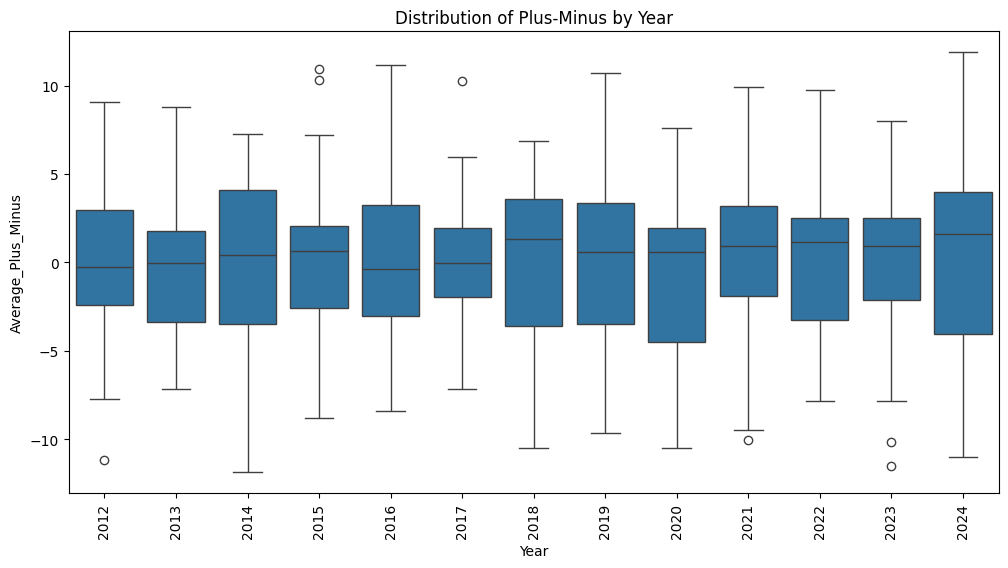

In [ ]:
anova_result = stats.f_oneway(*[average_plus_minus_per_year[average_plus_minus_per_year['Year'] == year]['Average_Plus_Minus'] for year in average_plus_minus_per_year['Year'].unique()])

# Results of the ANOVA test
print('ANOVA Result:', anova_result)


plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Average_Plus_Minus', data=average_plus_minus_per_year)
plt.title('Distribution of Plus-Minus by Year')
plt.xticks(rotation=90)
plt.show()

The results of the ANOVA determine that there was *NOT* a year that had a statistically different variance in the margin of victory for a given year. Though from the box and whisker plot, we can find a team and year where that team had an unusually excecptional margin of victory over the entire data set.

The next exploratory data analysis performed will test if Lebron's points per game during the playoffs is statistically different from his regular season points per game.

We use a Z test to compare Lebron's average points per game in the playoffs vs his career average points per game since the playoff points per game is a sample with n > 30

H0: Lebron's points per game in the playoffs are the same as his overall career points per game  
HA: Lebron's points per game in the playoffs are different as his overall career points per game

In [ ]:
lebron_points = lebron_career['PTS']
lebron_postseason_points = lebron_postseason['PTS']

# Assume 'lebron_points' and 'lebron_postseason_points' are pandas Series containing points data.
# Calculating sample statistics for regular season
mean_regular = lebron_points.mean()
std_regular = lebron_points.std()
n_regular = lebron_points.size

# Calculating sample statistics for postseason
mean_postseason = lebron_postseason_points.mean()
std_postseason = lebron_postseason_points.std()
n_postseason = lebron_postseason_points.size

# Calculate the standard error of the difference between the two means
se_difference = np.sqrt((std_regular**2 / n_regular) + (std_postseason**2 / n_postseason))

# Calculate the Z-score
z_score = (mean_regular - mean_postseason) / se_difference

# Calculate the p-value from the Z-score (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Displaying results
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between regular-season and postseason points.")
else:
    print("There is no statistically significant difference between regular-season and postseason points.")



Z-score: -1.9118
P-value: 0.0559
There is no statistically significant difference between regular-season and postseason points.


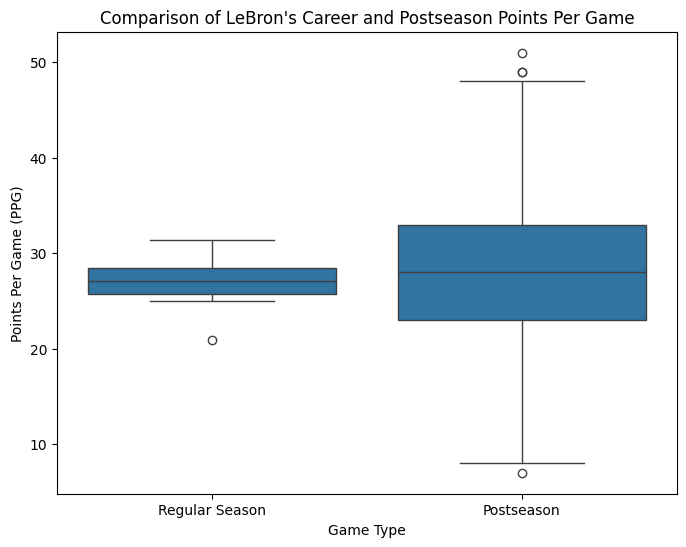

In [ ]:
# Create a DataFrame to hold both regular season and postseason PPG for plotting
data = pd.DataFrame({
    'PPG': pd.concat([lebron_career['PTS'], lebron_postseason['PTS']]),
    'Type': ['Regular Season'] * len(lebron_career) + ['Postseason'] * len(lebron_postseason)
})

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='PPG', data=data)
plt.title("Comparison of LeBron's Career and Postseason Points Per Game")
plt.xlabel("Game Type")
plt.ylabel("Points Per Game (PPG)")
plt.show()

The Z-test showed us that there was no statistically significant difference. In the box and whiskers plot, we can see that the median points per game for each of Lebron's years was pretty similar for regular season vs postseason, however, the variation for postseason was drastically larger. And this makes sense, because there are always less games played in the playoffs so the sample size for those is smaller, so the distribution of means would likely be larger.

Moving on more with the playoff box scores and looking again at comparing Lebron's stats. This time, we will look at his performances on the Lakers in the playoffs against when he was on the other teams in his career. We can use a Two Sample t-test because lakers playoff stats are a subset of his complete playoff stats

**Null Hypothesis**: The mean FG% in playoff games as a Laker is the same as his overall career playoff FG%.


**Alternative Hypothesis**: The mean FG% in playoff games as a Laker is different from his overall career playoff FG%.

**Alpha**: 0.05

In [ ]:
lakers_fg = lakers_lebron['FG_PCT']
total_fg = lebron['FG_PCT']
stats.ttest_ind(lakers_fg, total_fg).pvalue

0.05845917333881978

**We fail to reject the null hypothesis**. The p value is greater than alpha (0.05) so there is not enough evidence to reject the null hypothesis.

In [ ]:
lakers_fg_avg = (lakers_lebron['FG_PCT']).mean()
total_fg_avg = (lebron['FG_PCT']).mean()
lakers_fg_avg

0.5316458333333334

In [ ]:
total_fg_avg

0.4982473867595819

Text(0.5, 1.0, "Comparison of LeBron's FG% in Lakers Playoff Games vs Total Career Playoff Games")

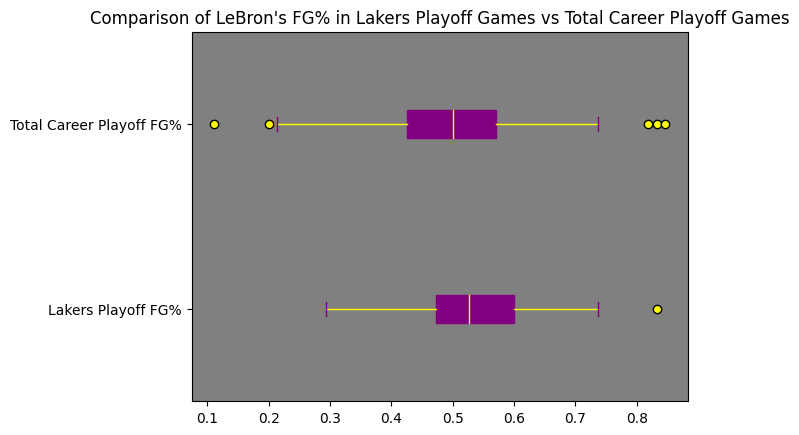

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.boxplot([lakers_fg, total_fg], labels=['Lakers Playoff FG%', 'Total Career Playoff FG%'], patch_artist=True, vert=False,
            boxprops=dict(facecolor='purple', color='purple'), whiskerprops=dict(color='yellow'),capprops=dict(color='purple'),
            medianprops=dict(color='yellow'),flierprops=dict(markerfacecolor='yellow', marker='o'))
ax.set_facecolor('gray')
plt.title('Comparison of LeBron\'s FG% in Lakers Playoff Games vs Total Career Playoff Games')

Once again, we did not seem to find any statistically significant differences based on our p value. And our visualiztion of the data shows that as well with both the medians and the variations looking pretty similar.

And for our final test, we will look at the 76er data in playoff games to see if the starters on their team tend to turn the ball over more than other teams, as turnovers is something that teams try to limit and could potentially be a reason for why the 76ers have been not as successful this century.

We will do a one sample T-Test. By doing this we can determine if a single sample of 76ers players is significantly different from the NBA population mean.

$\alpha$ = 0.05

In [ ]:
# Find the mean of TO for the Sixers
sixers_mean = sixers['TO'].mean()

# Find the mean of TO for the entire league
league_mean = box_scores['TO'].mean()

data = sixers['TO']
stats.ttest_1samp(data, popmean=league_mean)

TtestResult(statistic=0.7092091164327587, pvalue=0.4784125057041221, df=759)

With a p-value of 0.478, greater than our alpha level, we see that the sixers starters do not turn the ball over at a significantly higher rate than the league average.

Plot:

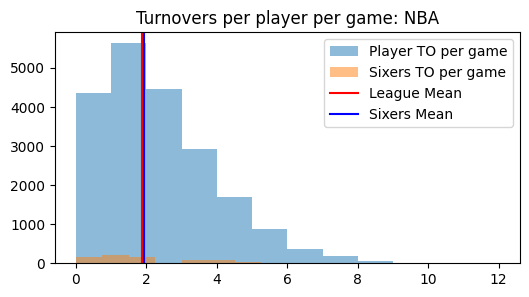

In [ ]:
# Plot the results of t test using matplot lib
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.hist(box_scores['TO'], bins=12, alpha=0.5, label='Player TO per game')
plt.hist(sixers['TO'], bins=12, alpha=0.5, label='Sixers TO per game')
plt.axvline(x=league_mean, color='r', label='League Mean')
plt.axvline(x=sixers_mean, color='b', label='Sixers Mean')
plt.legend(loc='upper right')
plt.title('Turnovers per player per game: NBA')
plt.show()

Once again, we did not find significantly significant evidence. This concludes our exploratory data analysis section. While we did not reject any null hypotheses, this really showed us the amount of [parity and equality in the NBA](https://www.nytimes.com/athletic/5829336/2024/10/14/nba-parity-salary-cap-rules-whats-next/)! It is hard to find anything truly different because of the sheer amount of data and how equal teams and players can play over time!

### Primary Analysis:
In this next step, we want to use the results, albeit not very many, from the exploratory data analysis and choose some machine learning techniques that might help us answer our initial questions. We will look into two things. Since turnovers didn't seem like it was what was making a team or player bad from the 76ers analysis, we can maybe create a model to predict the three most important and informative stat categories: points, rebounds, and assists. And after that, we can also potentially use a machine learning technique and create a model that can help both viewers and NBA analysts decide how to determine whether or not a player is "all-star caliber". For reference, in the exploratory analysis we saw so much parity and longevity with Lebron performing well over his entire career, both in the playopffs and across different teams and ages, and that is the type of player who has been an All-Star 20 times.

First off, we can try using linear regression for the points, rebounds, and assists based on minutes played especially since theoretically, all of these should increase and be correlated with the amount of minutes increasing!

Objectives:
1. Make a linear regression model to predict points based on minutes for a given player
2. make another model to predict rebounds based on minutes.
3. Make another model to predict assists based on minutes.

In [ ]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




Prepare Data:  
box_scores.csv is a file with stats for all players in playoff games since 1999. We will revisit the data cleaning step (something that is actually pretty common in the data science lifecycle!) to get more specific data that we want for this technique.

In [ ]:
# read csv file
df = pd.read_csv('box_scores.csv')

# drop rows where COMMENT starts with DNP
df = df[df['COMMENT'].astype(str).str.startswith('DNP') == False]

# convert PTS to float column
df['PTS'] = df['PTS'].apply(lambda x: float(x) if x != "" else 0)

# convert REB to float column
df['REB'] = df['REB'].apply(lambda x: float(x) if x != "" else 0)

# convert AST to float column
df['AST'] = df['AST'].apply(lambda x: float(x) if x != "" else 0)

# convert MIN to float column, MIN is in format MM:SS
df['MIN'] = df['MIN'].apply(lambda x: str(x).split(':')[0] if x != 0 else '0')
# make MIN 1 decimal place
df['MIN'] = df['MIN'].apply(lambda x: float(x) if x != "" else 0)

# drop NaN rows for MIN
df = df[df['MIN'].notnull()]
df = df[df['MIN'] != 'nan']

df.head(20)

temp = df[['PTS', 'REB', 'AST', 'MIN']]
temp.head(20)


,PTS,REB,AST,MIN
0,10.0,0.0,0.0,22.0
1,4.0,6.0,3.0,34.0
2,6.0,3.0,0.0,10.0
3,15.0,3.0,9.0,41.0
4,28.0,12.0,5.0,43.0
5,2.0,4.0,0.0,24.0
6,14.0,2.0,0.0,22.0
7,2.0,3.0,1.0,13.0
8,4.0,0.0,0.0,8.0
9,0.0,0.0,0.0,8.0


In [ ]:
pts_model = lm.LinearRegression()
reb_model = lm.LinearRegression()
ast_model = lm.LinearRegression()


Training with Points as the Dependent Variable

In [ ]:
X_train_pts, X_test_pts, y_train_pts, y_test_pts = train_test_split(temp[['MIN']], temp['PTS'], test_size=0.2, random_state=42)

# create a linear regression model for predicting points scored from minutes played
pts_model.fit(X_train_pts, y_train_pts)

# predict points scored for a player who played 30 minutes
print(pts_model.predict([[30]]))

[13.26880463]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Training with Rebounds as the Dependent Variable

In [ ]:
X_train_reb, X_test_reb, y_train_reb, y_test_reb = train_test_split(temp[['MIN']], temp['REB'], test_size=0.2, random_state=42)

# create a linear regression model for predicting rebounds from minutes played
reb_model.fit(X_train_reb, y_train_reb)

# predict rebounds for a player who played 30 minutes
print(reb_model.predict([[30]]))

[5.30947442]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Training with Assists as the Dependent Variable

In [ ]:
X_train_ast, X_test_ast, y_train_ast, y_test_ast = train_test_split(temp[['MIN']], temp['AST'], test_size=0.2, random_state=42)

# create a linear regression model for predicting assists from minutes played
ast_model.fit(X_train_ast, y_train_ast)

# predict assists for a player who played 30 minutes
print(ast_model.predict([[30]]))

[2.74002951]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Error: Model Performance

In [ ]:

# mean squared errors
print(f"Mean Squared Error for Points: {mean_squared_error(y_test_pts, pts_model.predict(X_test_pts))}")

print(f"Mean Squared Error for Rebounds: {mean_squared_error(y_test_reb, reb_model.predict(X_test_reb))}")

print(f"Mean Squared Error for Assists: {mean_squared_error(y_test_ast, ast_model.predict(X_test_ast))}")



Mean Squared Error for Points: 34.352423176319675
Mean Squared Error for Rebounds: 8.292685750064546
Mean Squared Error for Assists: 4.15383194328475


Clearly the error is high, so it seems the linear regression model is not a good fit for the data. We will visualize in the next step, but first, let's move onto making a neural network for predicting all-star status.

Neural Network

Objectives:

1. Gather required data from NBA api
2. Clean data in order to train on it
3. Build the neurl network
4. Train the neural network
5. Test accuracy of the neural network

Step 1: Gathering Data and cleaning it again

The necessary data will need to be large enough in order to be able to train the model while also being a period of time close enough together that the statistics of the earliest players are comperable to later players. In order to do this, 10 years of NBA player season averages will be obtained. Next, whether a player was an all star or not needs to be obtained.
  
Once again, we are revisiting earlier steps in the life cycle due to new findings that we had. Something that happens often in the field of data science!

In [ ]:
#These are the libraries used for the data gathering stage

from nba_api.stats.static import teams
from nba_api.stats.endpoints import LeagueGameFinder, commonteamroster, playercareerstats
import time
import pandas as pd
import os

This section obtains the teams in the nba. This will be necessary for obtaining all NBA players for 10 years. The 10 years of interest is the 2007-08 season to the 2016-2017 season.

In [ ]:
seasons = ["2016-17","2015-16","2014-15","2013-14","2012-13","2011-12","2010-11","2009-10","2008-09","2007-08"]

teams_file_path = "teams.csv"

if not os.path.exists(teams_file_path):

    all_teams = teams.get_teams()

    teams_df = pd.DataFrame(all_teams)

    teams_df.to_csv(teams_file_path)

teams_df = pd.read_csv(teams_file_path)

teams_df.head(10)

teams exist


,Unnamed: 0,id,full_name,abbreviation,nickname,city,state,year_founded
0,0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


Next is the query for all players in the NBA. A query is required to obtain the roster of a given team and then a query is required in order to obtain the statistics of an individual player. This query takes a very long time to run.

In [ ]:
all_player_stats_file_path = "all_player_stats.csv"

if not os.path.exists(all_player_stats_file_path):

    team_ids = pd.read_csv(teams_file_path)['id'].tolist()

    all_player_stats = []

    for season in seasons:

        # Get rosters for all teams in the season
        print(f"Starting with season: {season}")
        team_rosters = []
        for team_id in team_ids:
            time.sleep(10)
            try:
                roster = commonteamroster.CommonTeamRoster(
                    team_id=team_id,
                    season=season
                )
                roster_df = roster.get_data_frames()[0]
                roster_df['TEAM_ID'] = team_id
                team_rosters.append(roster_df)
            except Exception as e:
                print(f"Error fetching roster for team {team_id} in {season}: {e}")

        # Combine rosters
        if not team_rosters:
            continue

        combined_roster = pd.concat(team_rosters, ignore_index=True)

        print("sleeping to avoid rate limits")
        time.sleep(60)


        print("Rosters completed. Now retrieving individual stats")

        # Fetch stats for each player
        for _, player in combined_roster.iterrows():

            time.sleep(10)

            try:
                # Retrieve player career stats
                player_stats = playercareerstats.PlayerCareerStats(
                    player_id=player['PLAYER_ID']
                )

                # Get yearly stats DataFrame
                yearly_stats = player_stats.get_data_frames()[0]

                # Add player and season-specific information
                yearly_stats['PLAYER_NAME'] = player['PLAYER']
                yearly_stats['PLAYER_ID'] = player['PLAYER_ID']
                yearly_stats['TEAM_ID'] = player['TEAM_ID']

                # Filter for the specific seasons we're interested in
                yearly_stats = yearly_stats[yearly_stats['SEASON_ID'].str.contains(season)]

                all_player_stats.append(yearly_stats)

            except Exception as e:
                print(f"Error fetching stats for player {player['PLAYER']} ({player['PLAYER_ID']}): {e}")
                time.sleep(60)

        print(f"The new length of the all_player_stats {len(all_player_stats)} ")

        print("sleeping to avoid rate limits")
        time.sleep(60)

    # Combine all player stats

    combined_stats = pd.concat(all_player_stats, ignore_index=True)
    combined_stats.to_csv(all_player_stats_file_path)


combined_stats = pd.read_csv(all_player_stats_file_path)

combined_stats.head(10)

,Unnamed: 0,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER_NAME
0,0,200794,2016-17,0,1610612737,ATL,32.0,69,67,2343.0,...,111,422,533,252,90,62,158,186,1246,Paul Millsap
1,1,1627098,2016-17,0,1610612737,ATL,28.0,73,2,1248.0,...,10,113,123,193,39,1,95,112,391,Malcolm Delaney
2,2,101141,2016-17,0,1610612737,OKC,30.0,3,0,62.0,...,2,14,16,1,3,1,4,5,15,Ersan Ilyasova
3,3,101141,2016-17,0,1610612737,PHI,30.0,53,40,1447.0,...,71,243,314,97,33,14,78,133,786,Ersan Ilyasova
4,4,101141,2016-17,0,1610612737,ATL,30.0,26,12,633.0,...,42,109,151,43,22,8,34,73,270,Ersan Ilyasova
5,5,101141,2016-17,0,1610612737,TOT,30.0,82,52,2142.0,...,115,366,481,141,58,23,116,211,1071,Ersan Ilyasova
6,6,2730,2016-17,0,1610612737,ATL,31.0,74,74,2199.0,...,296,644,940,104,64,92,170,203,1002,Dwight Howard
7,7,203501,2016-17,0,1610612737,ATL,25.0,79,30,2154.0,...,35,189,224,182,55,15,106,103,1143,Tim Hardaway Jr.
8,8,1627752,2016-17,0,1610612737,ATL,23.0,59,10,981.0,...,25,132,157,55,43,27,61,96,335,Taurean Prince
9,9,101181,2016-17,0,1610612737,LAL,35.0,24,11,292.0,...,8,34,42,51,7,1,26,22,80,Jose Calderon


Next we obtain the all star data.

In [ ]:
all_star_game_file_path = "all_star_games.csv"

if not os.path.exists(all_star_game_file_path):

    all_star_games_last_10_years = pd.DataFrame()

    for season in seasons:
        gamefinder = LeagueGameFinder(season_nullable=season)
        games = gamefinder.get_data_frames()[0]


        all_star_games  = games[
            games['TEAM_NAME'].str.contains("All Star", case=False, na=False) & ~games['TEAM_NAME'].str.contains("NBADL", case=False, na=False) & ~games['TEAM_NAME'].str.contains("DLeague", case=False, na=False)

        ]

        all_star_games_last_10_years = pd.concat([all_star_games_last_10_years, all_star_games], ignore_index=True)

    all_star_games_last_10_years.to_csv(all_star_game_file_path,index=False)

all_star_games_last_10_years = pd.read_csv(all_star_game_file_path)

all_star_games_last_10_years.head(10)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,32016,1610616834,WST,West NBA All Stars West,31600001,2017-02-19,WST vs. EST,W,240,192,...,0.750,15,46,61,60,16,1,17,11,10.0
1,32016,1610616833,EST,East NBA All Stars East,31600001,2017-02-19,EST @ WST,L,239,182,...,1.000,10,40,50,43,17,1,19,5,-10.0
2,32015,1610616833,EST,East NBA All Stars East,31500001,2016-02-14,EST vs. WST,L,240,173,...,0.600,15,42,57,34,11,2,24,8,-23.0
3,32015,1610616834,WST,West NBA All Stars West,31500001,2016-02-14,WST @ EST,W,240,196,...,0.500,17,42,59,51,20,0,14,8,23.0
4,32014,1610616834,WST,West NBA All Stars West,31400001,2015-02-15,WST @ EST,W,234,163,...,0.889,24,46,70,42,14,0,21,3,5.0
5,32014,1610616833,EST,East NBA All Stars East,31400001,2015-02-15,EST vs. WST,L,234,158,...,0.833,17,38,55,40,18,2,18,6,-5.0
6,32013,1610616833,EST,East NBA All Stars East,31300001,2014-02-16,EST @ WST,W,235,163,...,1.000,9,38,47,46,12,0,14,13,8.0
7,32013,1610616834,WST,West NBA All Stars West,31300001,2014-02-16,WST vs. EST,L,233,155,...,0.750,19,35,54,42,11,0,14,8,-8.0
8,32012,1610616833,EST,East NBA All Stars East,31200001,2013-02-17,EST @ WST,L,240,138,...,0.762,18,38,56,33,8,3,20,10,-5.0
9,32012,1610616834,WST,West NBA All Stars West,31200001,2013-02-17,WST vs. EST,W,238,143,...,0.700,9,36,45,39,15,5,15,14,5.0


Then the roster of each all star team will be queried.

In [ ]:
def convert_season_id_to_season(season_id):
    start_year = int(str(season_id)[1:])  # Extract the starting year
    end_year = start_year + 1
    return f"{start_year}-{str(end_year)[2:]}"


all_star_rosters_path = "all_star_rosters.csv"

if not os.path.exists(all_star_rosters_path):

    all_star_games_last_10_years = pd.read_csv(all_star_game_file_path)

    all_rosters = []

    for _, row in all_star_games_last_10_years.iterrows():
        roster = commonteamroster.CommonTeamRoster( team_id = row['TEAM_ID'], season = convert_season_id_to_season(row['SEASON_ID']))
        roster_df = roster.get_data_frames()[0]
        if not roster_df.empty:
                all_rosters.append(roster_df)
        pd.concat(all_rosters, ignore_index=True) if all_rosters else pd.DataFrame()

    pd.concat(all_rosters).to_csv(all_star_rosters_path, index=False)


all_star_rosters = pd.read_csv(all_star_rosters_path)

all_star_rosters.head(10)

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610616834,2016,0,Russell Westbrook,Russell,russell-westbrook,0,G,6-3,200,"NOV 12, 1988",28.0,8,UCLA,201566,NaN
1,1610616834,2016,0,Kawhi Leonard,Kawhi,kawhi-leonard,2,F,6-7,230,"JUN 29, 1991",26.0,5,San Diego State,202695,NaN
2,1610616834,2016,0,DeAndre Jordan,DeAndre,deandre-jordan,6,C,6-11,265,"JUL 21, 1988",28.0,8,Texas A&M,201599,NaN
3,1610616834,2016,0,Klay Thompson,Klay,klay-thompson,11,G,6-7,215,"FEB 08, 1990",27.0,5,Washington State,202691,NaN
4,1610616834,2016,0,James Harden,James,james-harden,13,G,6-5,220,"AUG 26, 1989",27.0,7,Arizona State,201935,NaN
5,1610616834,2016,0,DeMarcus Cousins,DeMarcus,demarcus-cousins,15,F-C,6-11,270,"AUG 13, 1990",26.0,6,Kentucky,202326,NaN
6,1610616834,2016,0,Gordon Hayward,Gordon,gordon-hayward,20,F,6-8,226,"MAR 23, 1990",27.0,6,Butler,202330,NaN
7,1610616834,2016,0,Draymond Green,Draymond,draymond-green,23,F,6-7,230,"MAR 04, 1990",27.0,4,Michigan State,203110,NaN
8,1610616834,2016,0,Anthony Davis,Anthony,anthony-davis,23,F-C,6-11,253,"MAR 11, 1993",24.0,4,Kentucky,203076,NaN
9,1610616834,2016,0,Stephen Curry,Stephen,stephen-curry,30,G,6-3,190,"MAR 14, 1988",29.0,7,Davidson,201939,NaN


Next, a couple actions need to be taken. First, one issue with the NBA roster csv is that traded players will have multiple rows for a single season. The only thing that matters is the averages for the player, and having multiple rows for a singular player for one year will ruin the training process. To fix this, the total averages will be counted and the statistics earn on each respective team will be removed.

In [ ]:
all_players = pd.read_csv(all_player_stats_file_path)

duplicates = all_players[all_players.duplicated(subset=['PLAYER_ID', 'SEASON_ID'], keep=False)]
non_duplicates = all_players[~all_players.duplicated(subset=['PLAYER_ID', 'SEASON_ID'], keep=False)]

# Process duplicates
processed_duplicates = (
    duplicates
    .sort_values(by=['PLAYER_ID', 'SEASON_ID'])  # Sort to ensure stability
    .groupby(['PLAYER_ID', 'SEASON_ID'], group_keys=False)  # Group by player-season
    .apply(lambda group: group[group['TEAM_ABBREVIATION'] == 'TOT'] if 'TOT' in group['TEAM_ABBREVIATION'].values else group)
    .drop_duplicates(subset=['PLAYER_ID', 'SEASON_ID'])  # Ensure one row per player-season
)

# Combine back with non-duplicates
removed_duplicates = pd.concat([non_duplicates, processed_duplicates])

removed_duplicates.head(10)

C:\Users\evanh\AppData\Local\Temp\ipykernel_33136\2192520677.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicates


,Unnamed: 0,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER_NAME
0,0,200794,2016-17,0,1610612737,ATL,32.0,69,67,2343.0,...,111,422,533,252,90,62,158,186,1246,Paul Millsap
1,1,1627098,2016-17,0,1610612737,ATL,28.0,73,2,1248.0,...,10,113,123,193,39,1,95,112,391,Malcolm Delaney
6,6,2730,2016-17,0,1610612737,ATL,31.0,74,74,2199.0,...,296,644,940,104,64,92,170,203,1002,Dwight Howard
7,7,203501,2016-17,0,1610612737,ATL,25.0,79,30,2154.0,...,35,189,224,182,55,15,106,103,1143,Tim Hardaway Jr.
8,8,1627752,2016-17,0,1610612737,ATL,23.0,59,10,981.0,...,25,132,157,55,43,27,61,96,335,Taurean Prince
12,12,203471,2016-17,0,1610612737,ATL,23.0,79,78,2485.0,...,42,206,248,499,74,16,258,149,1414,Dennis Schröder
13,13,203145,2016-17,0,1610612737,ATL,27.0,73,64,1963.0,...,45,186,231,177,91,52,125,165,801,Kent Bazemore
14,14,200757,2016-17,0,1610612737,ATL,33.0,62,42,1596.0,...,54,216,270,107,96,31,58,97,444,Thabo Sefolosha
15,15,203527,2016-17,0,1610612737,ATL,26.0,16,0,110.0,...,1,17,18,8,4,5,4,5,25,Ryan Kelly
16,16,203488,2016-17,0,1610612737,ATL,25.0,70,3,1237.0,...,76,164,240,95,30,41,55,97,435,Mike Muscala


The all star rosters needs to be combined with the NBA roster csv. In order to do this, the NBA roster csv will have another collumn added that indicates whether a player is an all star or not. If the player is an all star then this attribute will have a value of 1 and 0 if they are not an all star (this will help with classification). In order to do this, the two datasets will be joined on the player id and season. In order to join on the season, the NBA roster csv will need to change the format of expressing the season and the name of the attribute.

In [ ]:
removed_duplicates['SEASON_ID'] = removed_duplicates['SEASON_ID'].str[:4]

removed_duplicates.rename(columns={"SEASON_ID": "SEASON"}, inplace=True)

all_star_df = pd.read_csv(all_star_rosters_path)

removed_duplicates['SEASON'] = removed_duplicates['SEASON'].astype(str)
all_star_df['SEASON'] = all_star_df['SEASON'].astype(str)

# Perform the merge
merged_df = removed_duplicates.merge(
    all_star_df[['PLAYER_ID', 'SEASON']],
    on=['PLAYER_ID', 'SEASON'],
    how='left',
    indicator=True
)

# Add the is_all_star column
merged_df['is_all_star'] = (merged_df['_merge'] == 'both').astype(int)

# Drop the '_merge' column if not needed
merged_df = merged_df.drop(columns=['_merge'])

merged_df = merged_df.drop(['LEAGUE_ID','TEAM_ID','TEAM_ABBREVIATION','SEASON'],axis=1)

merged_df.head(10)

,Unnamed: 0,PLAYER_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER_NAME,is_all_star
0,0,200794,32.0,69,67,2343.0,430,972,0.442,75,...,422,533,252,90,62,158,186,1246,Paul Millsap,1
1,1,1627098,28.0,73,2,1248.0,145,388,0.374,26,...,113,123,193,39,1,95,112,391,Malcolm Delaney,0
2,6,2730,31.0,74,74,2199.0,388,613,0.633,0,...,644,940,104,64,92,170,203,1002,Dwight Howard,0
3,7,203501,25.0,79,30,2154.0,415,912,0.455,149,...,189,224,182,55,15,106,103,1143,Tim Hardaway Jr.,0
4,8,1627752,23.0,59,10,981.0,114,285,0.400,33,...,132,157,55,43,27,61,96,335,Taurean Prince,0
5,12,203471,23.0,79,78,2485.0,548,1214,0.451,100,...,206,248,499,74,16,258,149,1414,Dennis Schröder,0
6,13,203145,27.0,73,64,1963.0,295,721,0.409,92,...,186,231,177,91,52,125,165,801,Kent Bazemore,0
7,14,200757,33.0,62,42,1596.0,174,395,0.441,41,...,216,270,107,96,31,58,97,444,Thabo Sefolosha,0
8,15,203527,26.0,16,0,110.0,8,28,0.286,4,...,17,18,8,4,5,4,5,25,Ryan Kelly,0
9,16,203488,25.0,70,3,1237.0,170,337,0.504,46,...,164,240,95,30,41,55,97,435,Mike Muscala,0


Now that it is known whether a player is an all star or not, the focus turns to the statistics. In this case, the statistics of each player needs to be turned into per game averages. The current data is season totals. The reason for this change is that different players might have played a different amount of games and might not be directly comparable. Also, for prediction reasons, it is more useful to train off of per game averages because by the time the season totals are available (at the end of the season), the all star game has already happened.

In [ ]:
stat_columns = ["MIN","FGM","FGA","FG3M","FG3A","FTM","FTA","OREB","DREB","REB","AST","STL","BLK","TOV","PF","PTS"]

merged_df["GP"] = merged_df["GP"].replace(0, pd.NA)

# Avoid division by zero
merged_df["GP"] = merged_df["GP"].replace(0, pd.NA)

# Convert totals to per-game stats, overwriting the original columns
for col in stat_columns:
    merged_df[col] = (merged_df[col] / merged_df["GP"]).round(2)

merged_df.to_csv('cleaned_roster_data.csv')

merged_df.head(10)

,Unnamed: 0,PLAYER_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER_NAME,is_all_star
0,0,200794,32.0,69,67,33.96,6.23,14.09,0.442,1.09,...,6.12,7.72,3.65,1.30,0.90,2.29,2.70,18.06,Paul Millsap,1
1,1,1627098,28.0,73,2,17.10,1.99,5.32,0.374,0.36,...,1.55,1.68,2.64,0.53,0.01,1.30,1.53,5.36,Malcolm Delaney,0
2,6,2730,31.0,74,74,29.72,5.24,8.28,0.633,0.00,...,8.70,12.70,1.41,0.86,1.24,2.30,2.74,13.54,Dwight Howard,0
3,7,203501,25.0,79,30,27.27,5.25,11.54,0.455,1.89,...,2.39,2.84,2.30,0.70,0.19,1.34,1.30,14.47,Tim Hardaway Jr.,0
4,8,1627752,23.0,59,10,16.63,1.93,4.83,0.400,0.56,...,2.24,2.66,0.93,0.73,0.46,1.03,1.63,5.68,Taurean Prince,0
5,12,203471,23.0,79,78,31.46,6.94,15.37,0.451,1.27,...,2.61,3.14,6.32,0.94,0.20,3.27,1.89,17.90,Dennis Schröder,0
6,13,203145,27.0,73,64,26.89,4.04,9.88,0.409,1.26,...,2.55,3.16,2.42,1.25,0.71,1.71,2.26,10.97,Kent Bazemore,0
7,14,200757,33.0,62,42,25.74,2.81,6.37,0.441,0.66,...,3.48,4.35,1.73,1.55,0.50,0.94,1.56,7.16,Thabo Sefolosha,0
8,15,203527,26.0,16,0,6.88,0.50,1.75,0.286,0.25,...,1.06,1.12,0.50,0.25,0.31,0.25,0.31,1.56,Ryan Kelly,0
9,16,203488,25.0,70,3,17.67,2.43,4.81,0.504,0.66,...,2.34,3.43,1.36,0.43,0.59,0.79,1.39,6.21,Mike Muscala,0


Now, we have all the data we need for the neural network! The first step to building a neural network is determining what features are used and what is the target. In this case, every statistic except the player name and player ID will be taken into consideration for the classification of a player.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_roster_data.csv')

features = data.drop(columns=['Unnamed: 0','is_all_star', 'PLAYER_NAME','PLAYER_ID'])
target = data['is_all_star']

Next is splitting the data into the train portion and test portion. The test size will be 20% of the data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=87)

The neural network will have a structure of the initial features of the model in the first layer (22). Then the second layer is 64 nodes, then 32, then 1.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


class AllStarPredictionNN(nn.Module):
    def __init__(self, input_size):
        super(AllStarPredictionNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x


model = AllStarPredictionNN(input_size=X_train.shape[1])


criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Now, we will train the model.

Epoch [10/100], Loss: 0.0023
Epoch [20/100], Loss: 0.0019
Epoch [30/100], Loss: 0.0016
Epoch [40/100], Loss: 0.0013
Epoch [50/100], Loss: 0.0011
Epoch [60/100], Loss: 0.0009
Epoch [70/100], Loss: 0.0008
Epoch [80/100], Loss: 0.0007
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0005


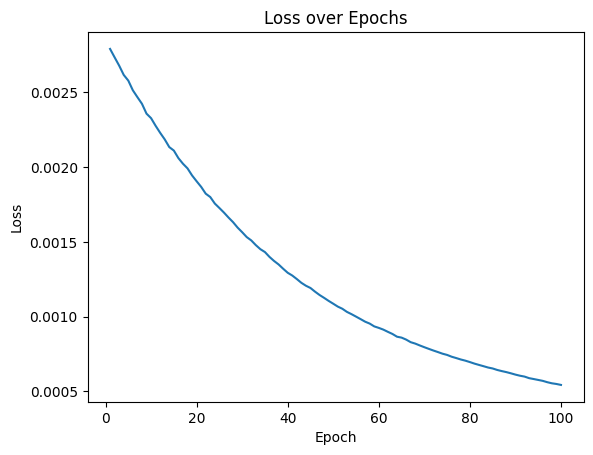

In [ ]:
losses = []

epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)


    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    losses.append(loss.item())

plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

And finally, we can test the accuracy.

In [ ]:
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    y_pred = model(X_test_tensor).squeeze()
    y_pred = (y_pred > 0.5).float()


accuracy = (y_pred == y_test_tensor).float().mean()
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9588


This is a pretty high accuracy!! The training of the model was very successful in obtaining accurate results. **The model resulted in a 95.88 percent accuracy** which is very high. In addition, the loss over the epoch indicates a increasingly better model to fit the data.

### Visualization:
In this next step, we can look more into the results of the primary analyses with plots! It's a little difficult to visualize the neural network, so we will just stick with the linear regression for this tutorial.
  


Let's visualize the three linear regression models that we made in the last step!

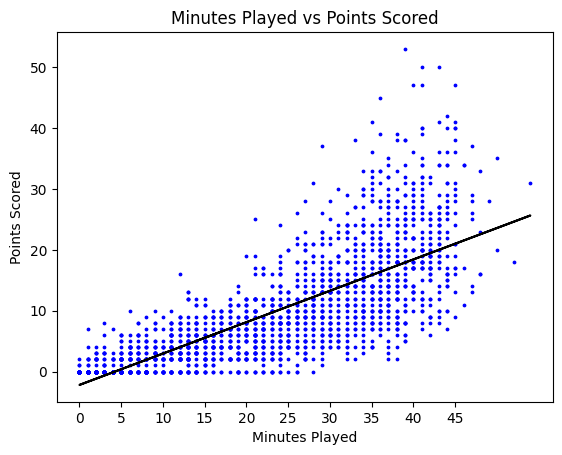

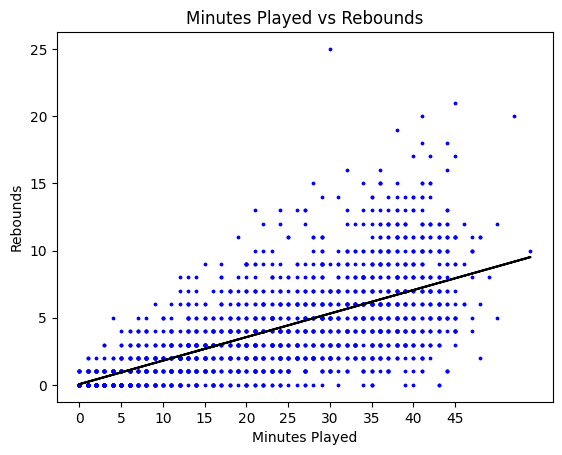

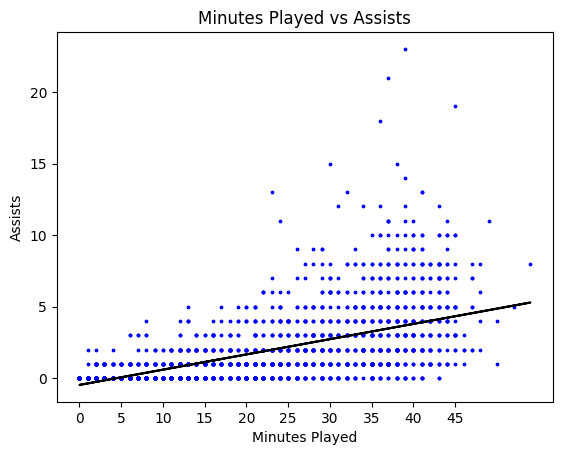

In [ ]:
# sample for 100 rows
temp = temp.sample(2000)

# plot the relationship between minutes played and points scored, and plot the regression line

plt.scatter(temp['MIN'], temp['PTS'], color='blue', s=3)
plt.plot(temp['MIN'], pts_model.predict(temp[['MIN']]), color='black')
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.title('Minutes Played vs Points Scored')
plt.show()

# plot the relationship between minutes played and rebounds, and plot the regression line
plt.scatter(temp['MIN'], temp['REB'], color='blue', s=3)
plt.plot(temp['MIN'], reb_model.predict(temp[['MIN']]), color='black')
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Minutes Played')
plt.ylabel('Rebounds')
plt.title('Minutes Played vs Rebounds')
plt.show()

# plot the relationship between minutes played and assists, and plot the regression line
plt.scatter(temp['MIN'], temp['AST'], color='blue', s=3)
plt.plot(temp['MIN'], ast_model.predict(temp[['MIN']]), color='black')
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Minutes Played')
plt.ylabel('Assists')
plt.title('Minutes Played vs Assists')
plt.show()




Now that we see what they look like, we can see that there's just so much data everywhere that the linear regression model doesn't seem to quite fit it. Let's calculate the R squared values now.

In [ ]:
# calculate the r^2 value for the relationship between minutes played and points scored
print(f"R^2 for Points Model: {pts_model.score(X_test_pts, y_test_pts)}")

# calculate the r^2 value for the relationship between minutes played and rebounds
print(f"R^2 for Rebounds Model: {reb_model.score(X_test_reb, y_test_reb)}")

# calculate the r^2 value for the relationship between minutes played and assists
print(f"R^2 for Assists Model: {ast_model.score(X_test_ast, y_test_ast)}")

R^2 for Points Model: 0.5750385397946034
R^2 for Rebounds Model: 0.3972171124283227
R^2 for Assists Model: 0.33468921464739976


Evidently, the linear model is not quite the best option for this use, as the MSE is quite high. The $R^2$ values are clearly bad as well, suggesting that not much of the variance in points/rebounds/assists can be explained by minutes played. There must be more exploration done to determine what makes a good playoff performer in the NBA. The Neural Network results are much more conducive to accurate results, clearly!
  
Using the visualization here, we can exactly see what the problems are and why we had such high error in the last step! :')

### Insights and Conclusion:
While players statistics can be a great signal, there are many traits that cannot be quantified. We cannot quantify the winning mentaltity or the work ethic that the players have. With that said, statistics allow us to look at the game in a different way. We can use these statistics to gameplan more effectively. We can also use visualizations to see trends in the data. In this project, we learned many valuable lessons.


When we create visualizations, we need to present the data in a way that can effectively send a message. If we were generating the data for a coach, the coach does not need to worry about the backend calculations. The coach wants to know what the trend is, so he can make the correct adjustments.


When trying to make a machine learning model, we ran into errors. When using linear regression we found the $R^2$ values to be really low. This shows that a regression model is not adequate for this task. It also shows that there may not be the correlation in the data that we initially thought. On the other hand, we found the Neural Network to be very accurate for predicting All-Stars. We found it has a 95% accuracy. This shows that a neural network can be used to accurately classify NBA players into All-Stars and Non-All-Stars.


This project was a very cool look into how sports analytics are used. While we only scraped the surface, we did learn many techniques used to implement data analytics into this field. There are many ways we can expand on this project too. We can gather a wider source of data from the NBA API and use some more advanced machine learning techniques to generate insights. We can create different roster combinations and test their effectiveness. We can try and generate a player synergy score to see how well players play together. With data science, we can look at the game of basketball under a completely different lens.
  
Overall, we hope you were able to see the many different steps of the data science lifecycle throughout our project, and also the very important idea that it is a cycle! so there are oftentimes jumps to previous steps if there is new information that a data scientist wants to visit. Data science is a field that is super open-ended and it is completely up to the data scientist to decide what they want to do with the data they collect! It is really just a learning curve in finding the right data, cleaning it, exploring it thoroughly and then finally using that data to build models and make predictions. This will often-times take a lot of effort to get exactly what you want! Thank you for reading through our tutorial :D.